![](images/mk.png)

<h1><center>ONLINE SUPPLEMENT</center></h1>

John McLevey & Reid-McIlroy-Young. **Introducing *metaknowledge*: Software for Computational Research in Information Science, Science of Science, and Network Analysis.** *Journal of Informetrics*. 11:176-197.

<h1><center>Part 1: Working With Record Collections</center></h1>

These supplementary notebooks were prepared by Dr. [John McLevey](http://www.johnmclevey.com/) (University of Waterloo), [Reid McIlroy-Young](http://reidmcy.com/) (University of Chicago), and [Jillian Anderson](http://networkslab.org/) (NetLab, University of Waterloo). 

# Getting Started

### Installing Python, the Scientific Stack, and *metaknowledge*

This Github repository contains the data and executable code accompanying our article "Introducing metaknowledge: Software for Computational Research in Information Science, Science of Science, and Network Analysis."

To use this Juputer Notebook: 

1. Download or clone this [Github repository](https://github.com/mclevey/metaknowledge_article_supplement)
2. Download and install the [Anaconda distribution of Python3](https://www.continuum.io/downloads)
3. Download and install the current public releases of *metaknowledge*, *networkx*, and *NLTK* as described in the article text
4. From the same directory the Jupyter Notebook is in, type `jupyter notebook` on the command line

### Load Packages

In [14]:
import metaknowledge as mk
import pandas

# for static graphs 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
get_ipython().magic("config InlineBackend.figure_format = 'retina'")

sns.set_style(style="white") # change the default background plot colour
sns.set(font_scale=.75)
plt.rc("savefig", dpi=400) # improve default resolution of graphics

# for interactive graphs 
import plotly.plotly as py
import plotly.graph_objs as go
# if this is your first time using plot.ly, you will need to sign up
# for a free account and get an API key. details here: https://plot.ly/python/getting-started/
# alternatively, you can skip the plot.ly graphs use Seaborn to produce static graphs, or
# you could produce interactive graphs using another package, such as Bokeh. 

The data files for our notebooks should be in a directory called `raw_data`.

# Creating and Processing Record Collections

### Parsing Raw Data to Create Records and RecordCollections

We have already set the working directory. All we need to do to create a `Record Collection` is provide the rest of the file path to the raw data. We will use the information science and bibliometrics dataset used in the "Introducing *metaknowledge*" article.

In [15]:
RC = mk.RecordCollection('raw_data/imetrics/', cached = True)
len(RC)

8140

We can easily write the full dataframe to a `.csv` file using the `writeCSV` method. This file can, of course, be used by any other research software.

In [16]:
RC.writeCSV('generated_datasets/records.csv')

Of course it is also possible to continue working in Python. *metaknowledge* has some useful functions for working with `Record Collections`, but researchers can also use other Python packages such as *Pandas*. 

The code block below uses the *metaknowledge* method `yearSplit` to extract the records published in 2013 and 2014 and shows the estimates for author gender. The process for estimating author genders uses birth record and name data. It is described in the article. 

In [17]:
RC1314 = RC.yearSplit(2013, 2014)
gender_breakdown = RC1314.genderStats()
gender_breakdown

{'Female': 506, 'Male': 1349, 'Unknown': 1361}

The `glimpse` method in *metaknowledge* is a convienent way to quickly view the most frequently occuring authors and journals, and the most highly cited articles. It will print a quick summary to screen. 

In [18]:
print(RC.glimpse())

RecordCollection glimpse made at: 2018-01-25 10:42:00
8140 Records from files-from-raw_data/imetrics/

Top Authors
1 Bornmann, Lutz
2 Leydesdorff, Loet
3 Thelwall, Mike
4 Rousseau, Ronald
5 SCHUBERT, A
6 Abramo, Giovanni
6 D'Angelo, Ciriaco Andrea
7 Glanzel, Wolfgang
8 Glanzel, W
9 Huang, Mu-Hsuan
10 BRAUN, T
10 Lariviere, Vincent
11 Waltman, Ludo
12 Ding, Ying
13 Daniel, Hans-Dieter
14 Cronin, Blaise
15 Rousseau, R
16 GLANZEL, W
17 Egghe, L.
17 Chen, Dar-Zen
17 MORAVCSIK, MJ
17 Egghe, Leo
18 Egghe, L

Top Journals
1 SCIENTOMETRICS
2 JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATION SCIENCE AND TECHNOLOGY
3 JOURNAL OF INFORMETRICS
4 JOURNAL OF THE ASSOCIATION FOR INFORMATION SCIENCE AND TECHNOLOGY

Top Cited
1 Hirsch JE, 2005, P NATL ACAD SCI USA, V102, P16569, DOI 10.1073/pnas.0507655102
2 Egghe L, 2006, SCIENTOMETRICS, V69, P131, DOI 10.1007/s11192-006-0144-7
3 SMALL H, 1973, J AM SOC INFORM SCI, V24, P265, DOI 10.1002/asi.4630240406
4 GARFIELD E, 1972, SCIENCE, V178, P471, DOI 10.1126

While `glimpse` is useful for getting a quick sense of the most frequently appearing authors and journals, and the most highly cited documents, most research workflows require direct interaction with the data stored in the `Record Collection`. The easiest way to do this is to convert the `Record Collection` into a [Pandas](http://pandas.pydata.org/pandas-docs/stable/) dataframe. This provides access to a wide range of methods for selecting, filtering, grouping, summarizing, modeling, and plotting data. 

In addition to the *Pandas* documentation, researchers may want to consult Wes McKinney's book [*Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython*](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython-ebook/dp/B009NLMB8Q) or an online tutorial (e.g. Julia Evans' [Pandas cookbook](https://jvns.ca/blog/2013/12/22/cooking-with-pandas/)).

In [19]:
df = pandas.DataFrame(RC.makeDict())
selectedVars = df[['AF', 'AB', 'PY', 'TI', 'SO', 'num-Authors', 'TC']]
selectedVars[:10] # show the first 10 rows.

,AF,AB,PY,TI,SO,num-Authors,TC
0,"[Schreiber, M., Malesios, C. C., Psarakis, S.]",The purpose of this article is to come up with...,2012,Exploratory factor analysis for the Hirsch ind...,JOURNAL OF INFORMETRICS,3,24
1,"[Guns, Raf, Rousseau, Ronald]",We introduce a method to predict or recommend ...,2014,Recommending research collaborations using lin...,SCIENTOMETRICS,2,3
2,"[Sangwal, Keshra]","The distributions of citations L, two- (IF2) a...",2013,Citation and impact factor distributions of sc...,JOURNAL OF INFORMETRICS,1,3
3,"[Albarran, Pedro, Ruiz-Castillo, Javier]",This article studies massive evidence about re...,2011,References Made and Citations Received by Scie...,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,2,43
4,"[Yu, Guang, Li, Yi-Jun]","In this article, we firstly analyze the refere...",2010,Identification of referencing and citation pro...,SCIENTOMETRICS,2,5
5,"[Sun, Xiaoling, Lin, Hongfei, Xu, Kan, Ding, Kun]",The large amounts of publicly available biblio...,2015,"How we collaborate: characterizing, modeling a...",SCIENTOMETRICS,4,0
6,"[Workman, Michael]",The collection and dissemination of informatio...,2008,Wisecrackers: A theory-grounded investigation ...,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,1,19
7,"[Chen, Yunwei, Boerner, Katy, Fang, Shu]",This paper reports first results on the interp...,2013,Evolving collaboration networks in Scientometr...,SCIENTOMETRICS,3,3
8,"[Kao, Chiang]",This paper surveys 56 internationally renowned...,2009,The authorship and country spread of Operation...,SCIENTOMETRICS,1,5
9,"[Doty, Philip]",None,2013,How information matters: Networks and public p...,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,1,0


The two letter variable names are the tags used by Web of Science. A description of the content of each tag is available [online](https://images.webofknowledge.com/images/help/WOS/h_fieldtags.html). The code block above shows 7 tags that are typically of interest, but there are many others available. 

In [20]:
df.columns.values.tolist()

['AB',
 'AF',
 'AU',
 'BP',
 'C1',
 'CA',
 'CL',
 'CR',
 'CT',
 'CY',
 'DE',
 'DI',
 'DT',
 'EI',
 'EM',
 'EP',
 'FU',
 'FX',
 'GA',
 'HO',
 'ID',
 'IS',
 'J9',
 'JI',
 'LA',
 'NR',
 'OI',
 'PA',
 'PD',
 'PG',
 'PI',
 'PM',
 'PT',
 'PU',
 'PY',
 'RI',
 'RP',
 'SC',
 'SI',
 'SN',
 'SO',
 'SP',
 'TC',
 'TI',
 'U1',
 'U2',
 'UT',
 'VL',
 'WC',
 'Z9',
 'num-Authors',
 'num-Female',
 'num-Male',
 'num-Unknown']

We can sort these dataframe by any quantitative variable. Below, we show the 40 most highly cited articles in the dataset. Changing or removing the `[:40]` affects the number of records shown.

In [21]:
top_40 = selectedVars.sort_values(['TC'], ascending = False)[:40]
top_40.head()

,AF,AB,PY,TI,SO,num-Authors,TC
2111,"[Egghe, Leo]",The g-index is introduced as an improvement of...,2006,Theory and practise of the g-index,SCIENTOMETRICS,1,538
6681,"[Ho, YS]",This study presents a literature review concer...,2004,Citation review of Lagergren kinetic rate equa...,SCIENTOMETRICS,1,527
4137,"[Liben-Nowell, David, Kleinberg, Jon]","Given a snapshot of a social network, can we i...",2007,The link-prediction problem for social networks,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,2,437
6997,"[Spink, A, Wolfram, D, Jansen, MBJ, Saracevic, T]",In studying actual Web searching by the public...,2001,Searching the Web: The public and their queries,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,4,365
3372,"[Meho, Lokman I., Yang, Kiduk]",The Institute for Scientific Information's (IS...,2007,Impact of data sources on citation counts and ...,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,2,315


We will create a new column called `short_title` that will contain the first 20 characters in the title. We can then use this new variable to create a horizontal bar graph with reasonable labels on the y-axis. (If we did not shorten them, the y-axis label would be as wide as the longest article title.)

In [22]:
trace = go.Bar(
            x=top_40['TI'],
            y=top_40['TC']
    )

data = [trace]

layout = go.Layout(
    yaxis=dict(
        title='Times Cited',
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='times-cited')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~KrOstir/0 or inside your plot.ly account where it is named 'times-cited'


In [23]:
top_40['short_title'] = top_40['TI'].str[:20]
top_40[['TI', 'short_title', 'TC']].head()

,TI,short_title,TC
2111,Theory and practise of the g-index,Theory and practise,538
6681,Citation review of Lagergren kinetic rate equa...,Citation review of L,527
4137,The link-prediction problem for social networks,The link-prediction,437
6997,Searching the Web: The public and their queries,Searching the Web: T,365
3372,Impact of data sources on citation counts and ...,Impact of data sourc,315


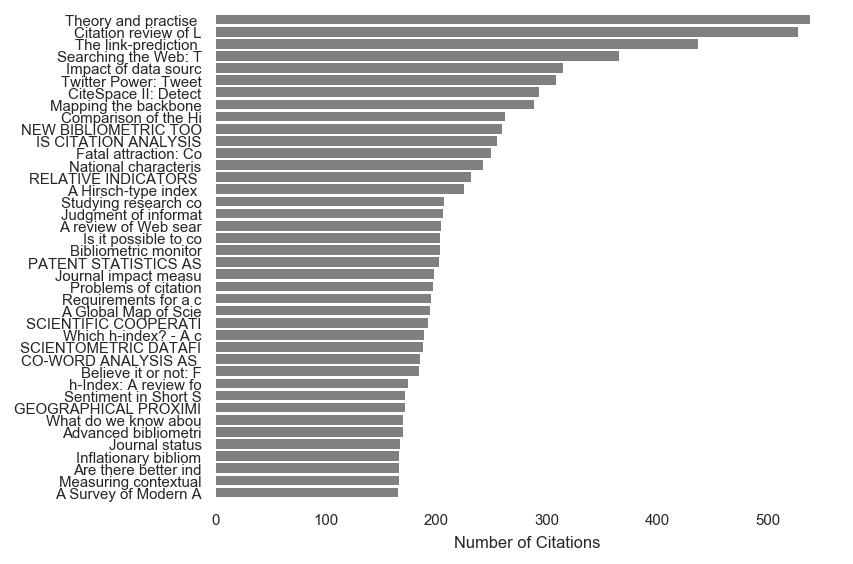

In [24]:
with sns.axes_style("white"):
    horizontal_bar = sns.barplot(data = top_40, x = 'TC', y = 'short_title', color = 'gray')
    horizontal_bar.set(xlabel='Number of Citations', ylabel='')
    sns.despine(left = True, right = True, bottom = True, top = True)
    plt.tight_layout()
plt.savefig('figures/horizontal_barplot.png')
plt.savefig('figures/horizontal_barplot.pdf')

Creating Time Series Datasets
-----------------------------

It is also easy to plot time series graphs, for example of article publications over time. We can do this by use the `timeSeries` method in *metaknowledge*, and converting the results into a *Pandas* dataframe that can be easily plotted. We will write the time series dataset to a `csv` file at the same time. 

In [25]:
#[2:] removes incomplete data from 2016
growth = pandas.DataFrame(RC.timeSeries('year', outputFile = 'generated_datasets/growth.csv'))[2:]
growth[:10]

,count,entry,year
2,643,2014,2014
3,572,2013,2013
4,545,2012,2012
5,494,2011,2011
6,535,2010,2010
7,467,2009,2009
8,389,2008,2008
9,395,2007,2007
10,353,2006,2006
11,267,2005,2005


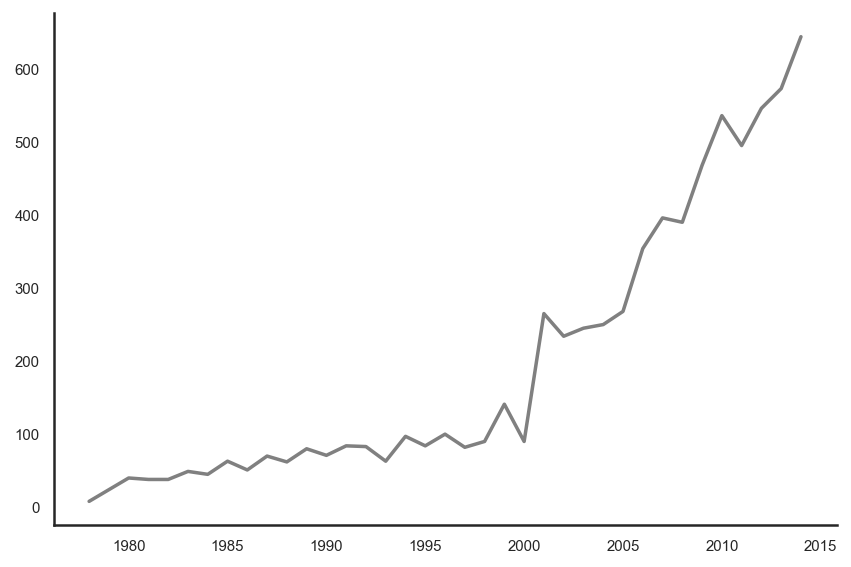

In [26]:
with sns.axes_style("white"):
    plt.plot(growth['year'], growth['count'], color = 'gray')
    sns.despine() # improve the look of the plot
    plt.tight_layout() # decrease white space around margins
plt.savefig("figures/growth_chart.pdf")

Static graphs are necessary for journal article plublications, packages like [Seaborn](https://seaborn.pydata.org) make it easy to produce publication quality graphs. One of the advantages of working in a Jupyter Notebook, however, is that we can use libraries like [Bokeh](http://bokeh.pydata.org) and [plot.ly](https://plot.ly/python/) to produce interactive graphs. These are especially helpful for exploratoring data. 

Let's produce the same line graph again, this time with plot.ly. Tip: hover over the points on the graph.

In [27]:
trace = go.Scatter(
    x = growth['year'],
    y = growth['count'],
    mode = 'lines+markers',
    name = 'lines+markers'
)

data = [trace]

layout = go.Layout(
    yaxis=dict(
        title='Number of Publications',
    ),
    xaxis=dict(
        title='Year',
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='growth-over-time')

We can also plot a subset of the data. Below, we extract the data for *Scientometrics* and *The Journal of Informetrics* and plot them side by side.

In [28]:
subset = ['SCIENTOMETRICS', 'JOURNAL OF INFORMETRICS']
growth_by_journal = pandas.DataFrame(RC.timeSeries('journal', 
    outputFile = 'generated_datasets/growth_journals.csv', limitTo = subset))
growth_by_journal[:10]

,count,entry,year
0,59,JOURNAL OF INFORMETRICS,2016
1,143,SCIENTOMETRICS,2016
2,84,JOURNAL OF INFORMETRICS,2015
3,343,SCIENTOMETRICS,2015
4,90,JOURNAL OF INFORMETRICS,2014
5,338,SCIENTOMETRICS,2014
6,103,JOURNAL OF INFORMETRICS,2013
7,249,SCIENTOMETRICS,2013
8,78,JOURNAL OF INFORMETRICS,2012
9,252,SCIENTOMETRICS,2012


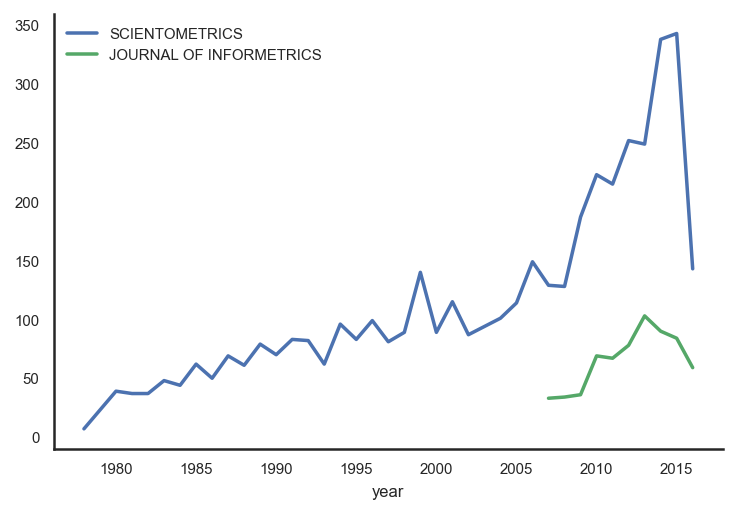

In [29]:
with sns.axes_style("white"):
    fig, ax = plt.subplots()
    growth_by_scientometrics = growth_by_journal[growth_by_journal['entry'] == 'SCIENTOMETRICS'][::-1]
    growth_by_informetrics = growth_by_journal[growth_by_journal['entry'] == 'JOURNAL OF INFORMETRICS'][::-1]
    growth_by_scientometrics.plot(ax = ax, y ='count', x = 'year', label = 'SCIENTOMETRICS')
    growth_by_informetrics.plot(ax = ax, y ='count', x = 'year', label = 'JOURNAL OF INFORMETRICS')
    sns.despine()
plt.savefig('figures/growth_compare.pdf')

Here's the interactive version with plot.ly. This time we will exclude 2016 data because our dataset does not include the full year. 

In [30]:
growth_by_journal2 = pandas.DataFrame(RC.timeSeries('journal', outputFile = 'generated_datasets/growth_journals.csv'))
growth_by_journal2.head()

,count,entry,year
0,59,JOURNAL OF INFORMETRICS,2016
1,143,SCIENTOMETRICS,2016
2,115,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,2016
3,84,JOURNAL OF INFORMETRICS,2015
4,343,SCIENTOMETRICS,2015


In [31]:
scientometrics = growth_by_journal2[(growth_by_journal2.entry == 'SCIENTOMETRICS') & (growth_by_journal2.year <= 2015)]
informetrics = growth_by_journal2[(growth_by_journal2.entry == 'JOURNAL OF INFORMETRICS') & (growth_by_journal2.year <= 2015)]
jaist = growth_by_journal2[(growth_by_journal2.entry == 'JOURNAL OF THE ASSOCIATION FOR INFORMATION SCIENCE AND TECHNOLOGY') & (growth_by_journal2.year <= 2015)]
jasist = growth_by_journal2[(growth_by_journal2.entry == 'JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATION SCIENCE AND TECHNOLOGY') & (growth_by_journal2.year <= 2015)]

In [32]:
trace1 = go.Scatter(
    x = scientometrics['year'],
    y = scientometrics['count'],
    mode = 'lines+markers',
    name = 'Scientometrics'
)
trace2 = go.Scatter(
    x = informetrics['year'],
    y = informetrics['count'],
    mode = 'lines+markers',
    name = 'Journal of Informetrics'
)
trace3 = go.Scatter(
    x = jaist['year'],
    y = jaist['count'],
    mode = 'lines+markers',
    name = 'JAIST (New Name)'
)
trace4 = go.Scatter(
    x = jasist['year'],
    y = jasist['count'],
    mode = 'lines+markers',
    name = 'JASIST (Old Name)'
)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    yaxis=dict(
        title='Number of Publications',
    ),
    xaxis=dict(
        title='Year',
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='growth-over-time-multiples')

Although the first issue of JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATION SCIENCE AND TECHNOLOGY came out in 1950, the Web of Science does not have meta-data on the journal before 2001. 

Other methods for working with `Record Collections` (e.g. for RPYS analysis, text analysis, and network analysis) are provided in the other supplementary Jupyter Notebooks. 